In [38]:
import pandas as pd
final_projects = pd.read_csv('final_projects', names=['name', 'classes', 'controllers'])
projects_data = pd.read_csv('repos_data_sorted')

projects_data = projects_data.sort_values('stars', ascending=False)

pd.concat([final_projects, projects_data], ignore_index=True)

merged_data = final_projects.merge(projects_data, left_on='name', right_on='name').drop_duplicates('name').sort_values('stars', ascending=False)


for index, row in merged_data.iterrows():
    user, repo = row['name'].split('/')

    merged_data.at[index, 'user'] = user
    merged_data.at[index, 'repo'] = repo
    
merged_data = merged_data.drop_duplicates(subset='classes')
    

merged_data.loc[merged_data['repo'] == 'jeecg']
merged_data




,name,classes,controllers,size,stars,forks,language,subscribers,open_issues,user,repo
414,miansen/Roothub,389,33,64444,100,37,Java,4,16,miansen,Roothub
700,huanglu20124/invoice,73,12,78906,95,55,Java,11,2,huanglu20124,invoice
622,Lab41/Dendrite,101,17,6344,92,25,JavaScript,13,18,Lab41,Dendrite
508,pibigstar/parsevip,90,17,17399,87,28,Java,3,0,pibigstar,parsevip
818,OCR4all/OCR4all,47,18,3648,86,15,JavaScript,22,13,OCR4all,OCR4all
...,...,...,...,...,...,...,...,...,...,...,...
432,wenhaofan/RuoYi-qiqiim,288,35,3720,1,1,JavaScript,0,2,wenhaofan,RuoYi-qiqiim
372,fengfeng521521/face,48,13,44300,1,0,JavaScript,1,0,fengfeng521521,face
158,guoshijiang/biwork_service,191,19,372,1,1,Java,1,0,guoshijiang,biwork_service
30,wxwdxn/aiwuliu,464,89,65384,1,0,Java,1,0,wxwdxn,aiwuliu


In [41]:
#merged_data.to_csv('merged_data.csv', index=False)

merged_data["classes"] = merged_data["classes"].astype(str).astype(int)
merged_data["controllers"] = merged_data["controllers"].astype(str).astype(int)
merged_data.dtypes

name           object
classes         int64
controllers     int64
size            int64
stars           int64
forks           int64
language       object
subscribers     int64
open_issues     int64
user           object
repo           object
dtype: object

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe47e84a910>]],
      dtype=object)

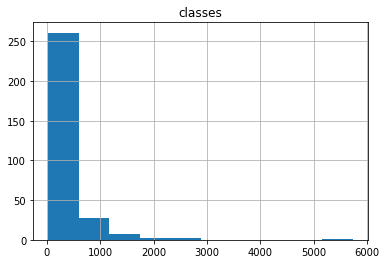

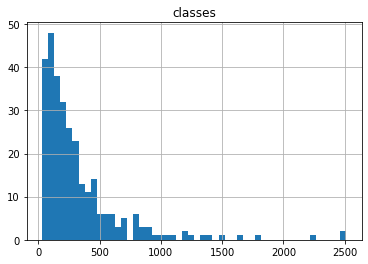

In [69]:
merged_data.hist('classes')
df2 = merged_data[merged_data['classes'] < 4000]
df2.hist('classes', bins=50)